In [6]:
import os
from pathlib import Path
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# loading python packages and files from repo root
if Path(os.getcwd()).name != "SSL4EO_base":
    os.chdir("..")
from data import GeobenchDataset

In [9]:
# initialize dataset
dataset_name = "m-bigearthnet"
split = "train"

dataset = GeobenchDataset(
    dataset_name=dataset_name,
    split=split,
    transform=None,
)
assert len(dataset) > 0, f"Dataset '{dataset_name}' should not be empty"

## Visual Inspection of Samples

In [13]:
# choosing a random sample
data = dataset[42]

In [15]:
s2 = data[0]
print(s2.shape)

labels = data[1]
print(labels.shape)

(12, 120, 120)
(43,)


In [16]:
# helper function to show images
def display_s2_image(s2, ax=None):
    if ax is None:
        ax = plt
    rgb_s2 = s2[[3, 2, 1]]
    # normalize for showing
    rgb_min = rgb_s2.min(axis=(1, 2), keepdims=True)
    rgb_max = rgb_s2.max(axis=(1, 2), keepdims=True)
    rgb_s2 = (rgb_s2 - rgb_min) / (rgb_max - rgb_min)
    ax.imshow(np.moveaxis(rgb_s2, 0, -1))

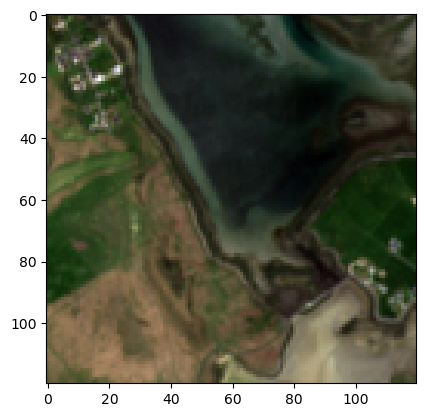

In [17]:
display_s2_image(s2)

### More Images

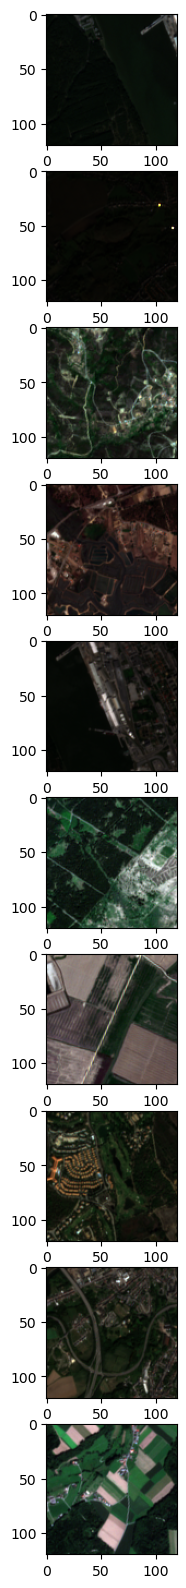

In [22]:
num_samples = 10

f, axes = plt.subplots(num_samples, figsize=(20, 20))
for i, ax in enumerate(axes):
    data = dataset[i]
    s2 = data[0]
    display_s2_image(s2, ax)